# 1. Getting the data ready

Importing all the necessary libraries.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Importing **ggplot** style.

In [2]:
mpl.style.use(['ggplot'])

After that we will get the dataset ready.

In [3]:
pl_data = pd.read_csv('players.csv', index_col=0)
pl_data.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


Rename all the feature so that all of them would have the same formatting.

In [4]:
pl_data.rename(columns={'Player':'player', 'collage':'college'}, inplace=True)
pl_data.head()

,player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


Let’s check feature types.

In [5]:
pl_data.dtypes

player          object
height         float64
weight         float64
college         object
born           float64
birth_city      object
birth_state     object
dtype: object

We see that **born** category has **float64** type. We should change it to **int**.<br>But before this step we should also check null items for **born** feature.

In [6]:
pl_data['born'].isnull().sum()

1

It seems that column has only one null cell.<br>This row also has the **player** null cell.

In [7]:
pl_data[pl_data.index == 223]

,player,height,weight,college,born,birth_city,birth_state
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s check how many null data has **player** cell.

In [8]:
pl_data['player'].isnull().sum()

1

It seems **player** and **born** features has only one missing data, and it’s common for them both.<br>
So we can remove this row from the dataset.

In [9]:
pl_data.dropna(subset=['player'], inplace=True)
pl_data.reset_index(drop=True, inplace=True)
pl_data.head()

,player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


Now we can change **born** feature type.

In [10]:
pl_data['born'] = pl_data['born'].astype('int')
pl_data.dtypes

player          object
height         float64
weight         float64
college         object
born             int32
birth_city      object
birth_state     object
dtype: object

In [11]:
pl_data.head()

,player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky


Also we should check the amount of rows to understand the proportions of features we are dealing with.

In [129]:
pl_data.shape

(3921, 7)

Now let’s use the describe function on numeric and categorial data.

In [13]:
pl_data.describe()

,height,weight,born
count,3921.000000,3921.000000,3921.00000
mean,198.704922,94.783219,1962.37975
std,9.269761,12.039515,20.33491
min,160.000000,60.000000,1913.00000
25%,190.000000,86.000000,1948.00000
50%,198.000000,95.000000,1964.00000
75%,206.000000,102.000000,1979.00000
max,231.000000,163.000000,1997.00000


In [14]:
pl_data[['player','college','birth_city', 'birth_state']].describe()

,player,college,birth_city,birth_state
count,3921,3573,3452,3439
unique,3921,422,1264,128
top,Curly Armstrong,University of Kentucky,Chicago,California
freq,1,89,114,344


Here it shows us what state gave the most players in the data set.<br>
It’s **California** (344 cases). So we can check how it had been changing through the years.

# 2. Visual comparsion of the two biggest birth states

First, we create subset for **California** born players.

In [52]:
calif_set = pl_data[pl_data['birth_state'] == 'California'][['born', 'birth_state']]
calif_set = calif_set.groupby('born').count()
calif_set.head()

,birth_state
born,
1919,1
1920,1
1922,4
1923,4
1925,1


Now we can build a **line plot**.

Text(0.5, 0, 'Year of Birth')

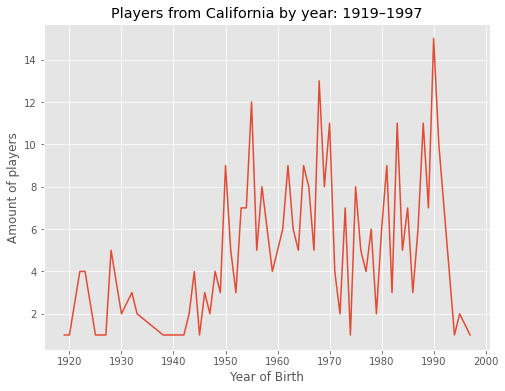

In [53]:
calif_set.plot(kind='line', figsize=(8, 6)).get_legend().remove()

plt.title('Players from California by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

As we can see, **California** state had two prominent periods for their representative players:
1) through 50s – 70s;<br>
2) around 1990 (early 90s).<br><br>
It alse had a great downfall right to 1997 year.<br>
For the further comparing we should find the second closest to California birth state.

In [55]:
pl_data.groupby('birth_state').count()['born'].sort_values(ascending=False)[:2]

birth_state
California    344
New York      290
Name: born, dtype: int64

As we see, it’s **New York**. Now we can build line plot for **New York**.

Text(0.5, 0, 'Year of Birth')

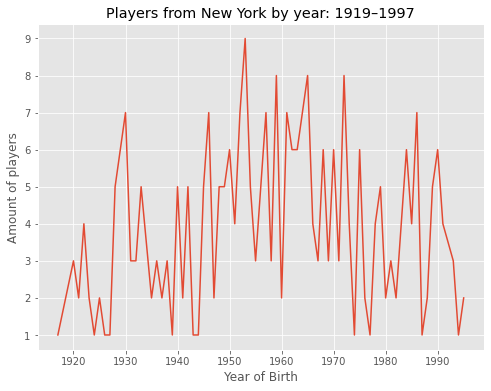

In [131]:
ny_set = pl_data[pl_data['birth_state'] == 'New York'][['born', 'birth_state']]
ny_set = ny_set.groupby('born').count()

ny_set.plot(kind='line', figsize=(8, 6)).get_legend().remove()

plt.title('Players from New York by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

The peak of this dataset is in 1950–1970 period.<br>
We also can compare the two previous plot on the one figure.<br>Let’s prepare dataset.

In [112]:
com_set = pl_data.loc[:,['born', 'birth_state']]
com_set = com_set[(com_set['birth_state'] == 'California')|(com_set['birth_state'] == 'New York')]
com_set.head()

com_set['New York'] = com_set['birth_state'] == 'New York'
com_set['New York'] = com_set['New York'].astype('int')
com_set['California'] = com_set['birth_state'] == 'California'
com_set['California'] = com_set['California'].astype('int')
com_set.drop(columns=['birth_state'], inplace=True)
com_set.reset_index(drop=True, inplace=True)
com_set.head()

,born,New York,California
0,1922,1,0
1,1927,1,0
2,1927,0,1
3,1917,1,0
4,1922,1,0


In [113]:
com_set.set_index('born', inplace=True)
com_set.head()

,New York,California
born,,
1922,1,0
1927,1,0
1927,0,1
1917,1,0
1922,1,0


In [114]:
com_set = com_set.groupby('born').sum()
com_set.head(10)

,New York,California
born,,
1917,1,0
1919,0,1
1920,3,1
1921,2,0
1922,4,4
1923,2,4
1924,1,0
1925,2,1
1926,1,0


Now let’s compare two line plots for **California** and **New York**.

Text(0.5, 0, 'Year of Birth')

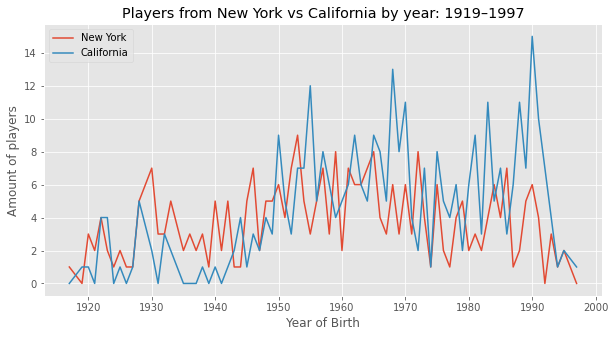

In [132]:
com_set.plot(kind='line', figsize=(10,5))

plt.title('Players from New York vs California by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

The plot shows us that **California** exceeded **New Yourk** around 1970 and 1990 years the most.<br>
But in the end of **90s** they both have similiar downfalls.<br>
It’s more clear on the area plots for these subsets.

Text(0.5, 0, 'Year of Birth')

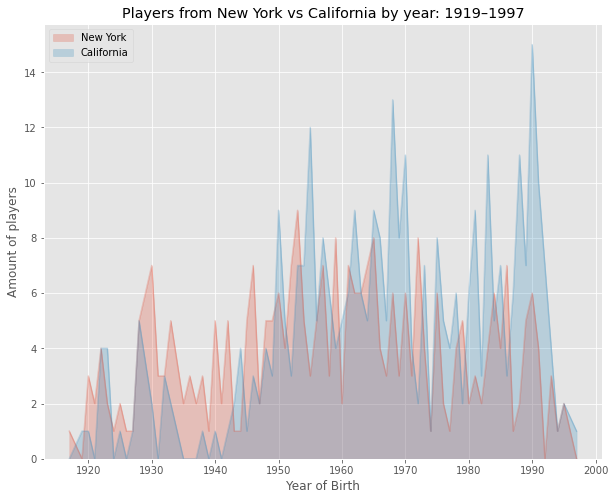

In [116]:
com_set.plot(kind='area',
             alpha=0.25,
             stacked=False,
             figsize=(10, 8))

plt.title('Players from New York vs California by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

Text(0.5, 0, 'Year of Birth')

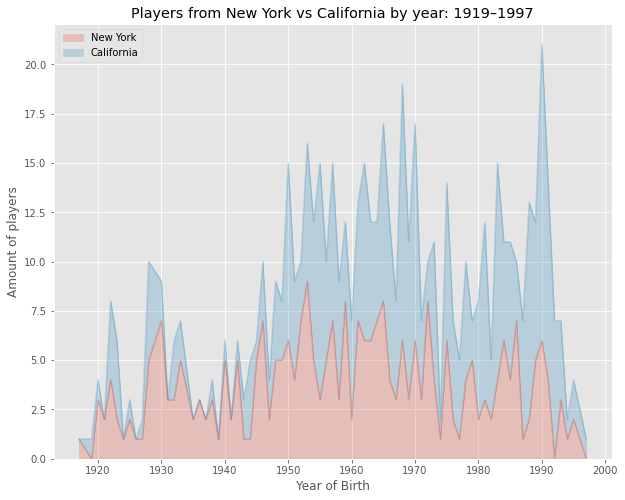

In [117]:
com_set.plot(kind='area',
             alpha=0.25,
             stacked=True,
             figsize=(10, 8))

plt.title('Players from New York vs California by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

Stacked bar plot and scatter plot are also useful fot such demonstration.

Text(0.5, 0, 'Year of Birth')

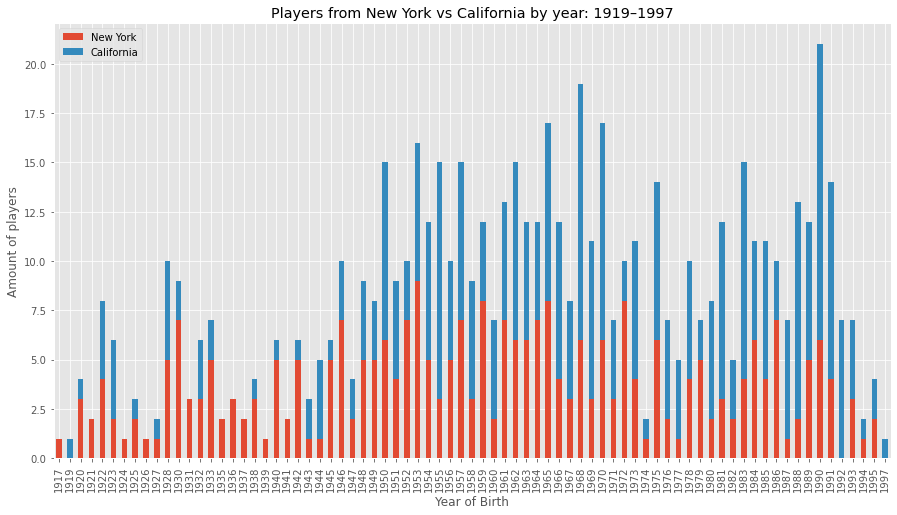

In [118]:
com_set.plot(kind='bar',
             stacked=True,
             figsize=(15, 8))

plt.title('Players from New York vs California by year: 1919–1997')
plt.ylabel('Amount of players')
plt.xlabel('Year of Birth')

In [120]:
res = com_set.reset_index()
res.head()

,born,New York,California
0,1917,1,0
1,1919,0,1
2,1920,3,1
3,1921,2,0
4,1922,4,4


In [121]:
norm_california = (com_set['California'] - com_set['California'].min()) / (com_set['California'].max() - com_set['California'].min())
norm_new_york = (com_set['New York'] - com_set['New York'].min()) / (com_set['New York'].max() - com_set['New York'].min())

Text(0.5, 0, 'Year of Birth')

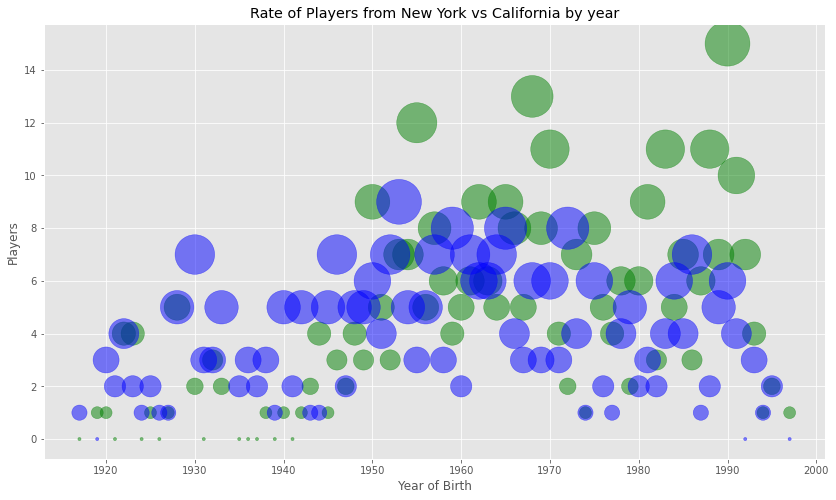

In [127]:
ax0 = res.plot(kind='scatter',
                    x='born',
                    y='California',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='green',
                    s=norm_california * 2000 + 10)

ax1 = res.plot(kind='scatter',
                    x='born',
                    y='New York',
                    alpha=0.5,
                    color="blue",
                    s=norm_new_york * 2000 + 10,
                    ax=ax0)

plt.title('Rate of Players from New York vs California by year')
plt.ylabel('Players')
plt.xlabel('Year of Birth')

# 3. Visual comparsion of height and weight in different periods

First, we should clear dataset from all the empty cells. We shoose **college** as one of the main features for this part.

In [64]:
pl_data['college'].isnull().sum()

348

In [65]:
pl_data[pl_data['college'].isnull()].head()

,player,height,weight,college,born,birth_city,birth_state
18,Jim Browne,208.0,106.0,NaN,1930,Midlothian,Illinois
26,Al Cervi*,180.0,77.0,NaN,1917,Buffalo,New York
65,Joe Graboski,201.0,88.0,NaN,1930,NaN,NaN
93,Wah Wah,180.0,77.0,NaN,1921,NaN,NaN
127,Stan Miasek,196.0,95.0,NaN,1924,NaN,NaN


In [66]:
college_data = pl_data.dropna(subset=['college'])
college_data.reset_index(drop=True, inplace=True)
college_data.head()

,player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky


In [67]:
college_data.shape

(3573, 7)

Now we can choose top 15 colleges according to the average **height** feature.

In [68]:
college_height = college_data[['college', 'height']].groupby('college').mean().sort_values(by='height', ascending=False)
college_height.head()

,height
college,
University of Bridgeport,231.0
Marist College,224.0
Barton County Community College,221.0
College of Saint Rose,218.0
Cheyney University of Pennsylvania,216.0


In [69]:
college_height_top = college_height.head(15)

Let’s check them on the horisontal bar plot.

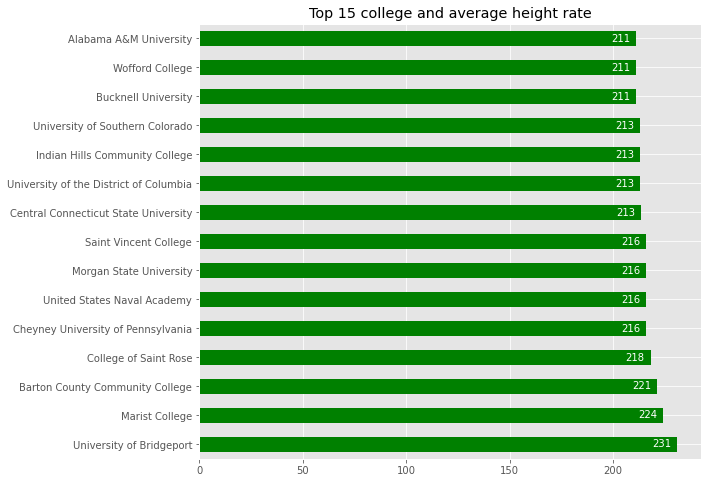

In [133]:
college_height_top.plot(kind='barh', figsize=(9, 8), legend=False, color='g')

plt.title('Top 15 college and average height rate')
plt.ylabel('')
plt.xlabel('')

for index, value in enumerate(college_height_top['height']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 12, index - 0.10), color='white')

We clearly see that players from **University of Bridgeport** had the highest average **height** result.<br>
Let’s check the same data for average **weight** feature.

In [71]:
college_weight = college_data[['college', 'weight']].groupby('college').mean().sort_values(by='weight', ascending=False)
college_weight_top = college_weight.head(15)

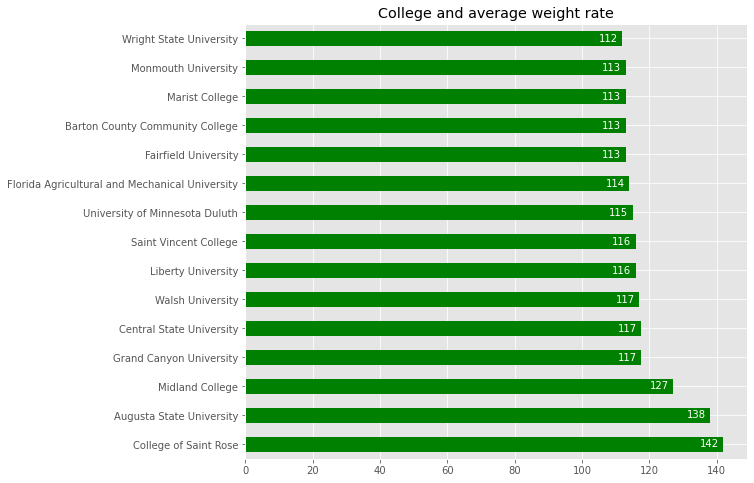

In [72]:
college_weight_top.plot(kind='barh', figsize=(9, 8), legend=False, color='g')

plt.title('College and average weight rate')
plt.ylabel('')
plt.xlabel('')

for index, value in enumerate(college_weight_top['weight']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 7, index - 0.10), color='white')

In this case **College of Saint Rose** has the highest results.<br>
We can compare average **height** and **weight** features of the top-15 colleges according to the amount of their players.<br>
First, we should get such list of colleges.

In [73]:
top_15 = pl_data.groupby('college').count()['born'].sort_values(ascending=False).head(15)
names_top_15 = top_15.reset_index()['college'].tolist()
names_top_15

['University of Kentucky',
 'University of California, Los Angeles',
 'University of North Carolina',
 'University of Kansas',
 'Duke University',
 'University of Notre Dame',
 'Indiana University',
 'Syracuse University',
 "St. John's University",
 'University of Louisville',
 'Michigan State University',
 'University of Arizona',
 'University of Minnesota',
 'Ohio State University',
 'University of Michigan']

Then we can create an appropriate dataset.

In [74]:
college_height_weight = college_data[['college', 'height', 'weight']].dropna()
top_college_height_weight = college_height_weight.groupby('college').mean()
result = top_college_height_weight.loc[names_top_15]
result

,height,weight
college,,
University of Kentucky,197.629213,94.966292
"University of California, Los Angeles",199.360465,94.674419
University of North Carolina,199.208955,95.716418
University of Kansas,200.372881,98.372881
Duke University,199.232143,96.428571
University of Notre Dame,197.098039,94.450980
Indiana University,197.857143,93.489796
Syracuse University,200.346939,95.000000
St. John's University,196.166667,91.312500


Now we can show the whole picture with the horisontal bar plot below.

<AxesSubplot:ylabel='college'>

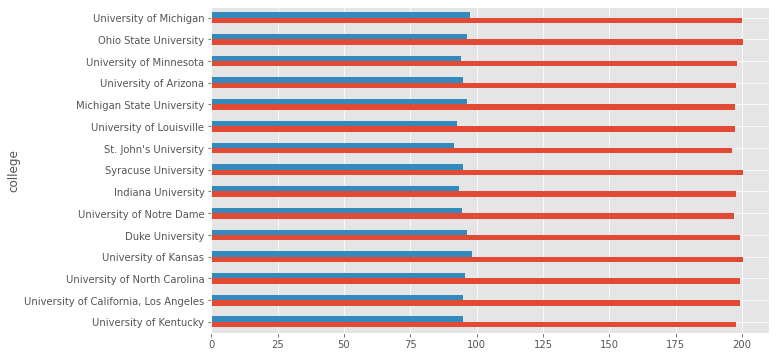

In [75]:
result.plot(kind='barh', figsize=(10,6), legend=False)

Now let’s check **height** and **weight** features according two time periods: from 1913 to 1955 and from 1956 to 2013.<br>
We can prepare the first subset.

In [77]:
low_55 = pl_data[pl_data['born'] <= 1955].loc[:,['height', 'weight']]
low_55.head()

,height,weight
0,180.0,77.0
1,188.0,83.0
2,193.0,86.0
3,196.0,88.0
4,178.0,79.0


And now the second subset.

In [78]:
over_55 = pl_data[pl_data['born'] > 1955].loc[:,['height', 'weight']].reset_index(drop=True)
over_55.head()

,height,weight
0,211.0,113.0
1,203.0,92.0
2,196.0,94.0
3,203.0,102.0
4,201.0,98.0


We can compare distributions of the subsets above using histograms.

<AxesSubplot:ylabel='Frequency'>

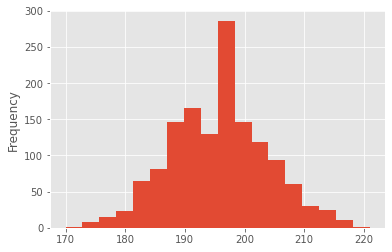

In [79]:
low_55['height'].plot(kind='hist', bins=18)

<AxesSubplot:ylabel='Frequency'>

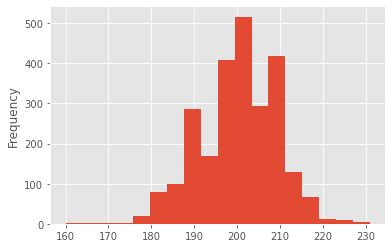

In [80]:
over_55['height'].plot(kind='hist', bins=18)

We also can compare this subsets with boxplots.

In [81]:
all_55 = pd.DataFrame()
all_55['low_55'] = low_55['height']
all_55['over_55'] = over_55['height']
all_55['over_55'].fillna(np.mean(all_55['over_55']), inplace=True)
np.sum(all_55.isnull())

low_55     0
over_55    0
dtype: int64

In [82]:
all_55.head(3)

,low_55,over_55
0,180.0,211.0
1,188.0,203.0
2,193.0,196.0


Text(0.5, 1.0, 'Player height: 1913–1955 vs 1956–2013')

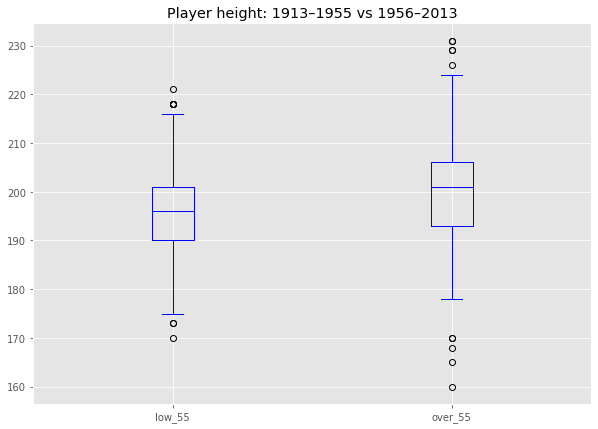

In [87]:
all_55.plot(kind='box', figsize=(10, 7), color='b')
plt.title('Player height: 1913–1955 vs 1956–2013')

We can see that two subsets don’t have statistical differences and each of them have several outliers.<br>
Now let’s check boxplot for **weight** subsets.

In [84]:
all_wght_55 = pd.DataFrame()
all_wght_55['low_55'] = low_55['weight']
all_wght_55['over_55'] = over_55['weight']
all_wght_55['over_55'].fillna(np.mean(all_wght_55['over_55']), inplace=True)
np.sum(all_wght_55.isnull())
all_wght_55.head()

,low_55,over_55
0,77.0,113.0
1,83.0,92.0
2,86.0,94.0
3,88.0,102.0
4,79.0,98.0


Text(0.5, 1.0, 'Player weight: 1913–1955 vs 1956–2013')

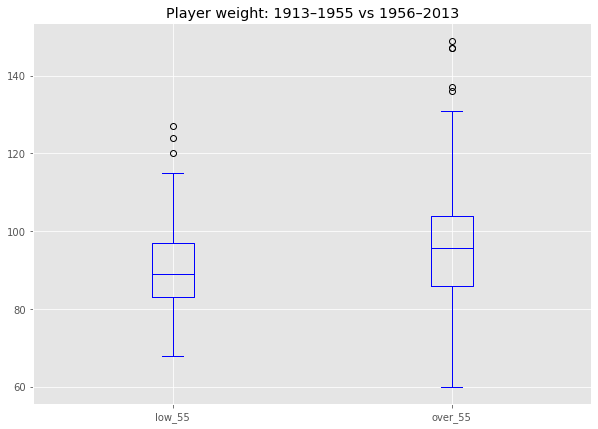

In [88]:
all_wght_55.plot(kind='box', figsize=(10, 7), color='b')
plt.title('Player weight: 1913–1955 vs 1956–2013')

The results are the same with **height** feature.